# Final Project : Classification

In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 

In [94]:
# loading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [6]:
train.columns      #both have same columns .

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

Here we see can see that the subscribed is the target variable
as we dont have subscribed attribute in test data set.


In [8]:
train.shape,test.shape

((31647, 18), (13564, 17))

In [12]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [13]:
test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

 We can see there are two format of data types:

object: Object format means variables are categorical. Categorical variables in our dataset are: job, marital, education, default, housing, loan, contact, month, poutcome, subscribed

int64: It represents the integer variables. Integer variables in our dataset are: ID, age, balance, day, duration, campaign, pdays, previous

In [15]:
train.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [18]:
train.isnull().sum()     #here we have cleaned data set .we dont have any null values.

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


# Univariate Analysis

In [19]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot: xlabel='yes/no', ylabel='subscribe count'>

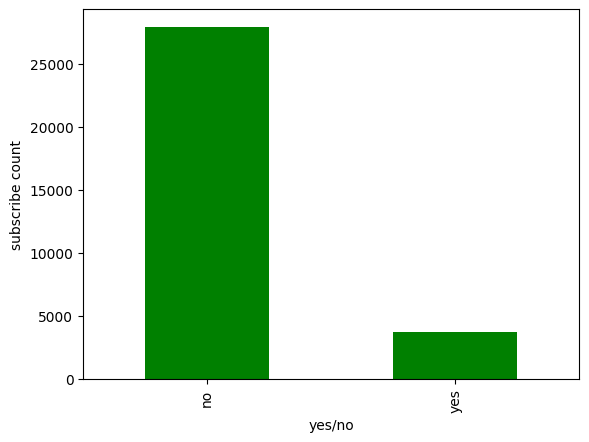

In [31]:

train['subscribed'].value_counts().plot.bar(color='Green',xlabel="yes/no",ylabel="subscribe count")

3715 users out of total 31647 have subscribed 

In [32]:
import seaborn as sn                   # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

<AxesSubplot: xlabel='age', ylabel='Density'>

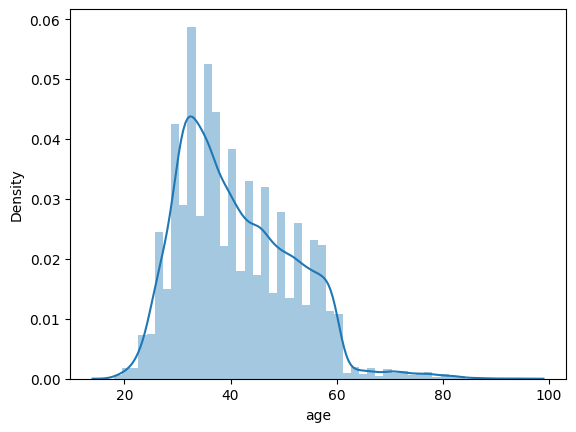

In [33]:
sn.distplot(train["age"])

We can infer that most of the clients fall in the age group between 20-60. Now let's look at what are the different types of jobs of the clients. As job is a categorical variable, we will look at its frequency table

<AxesSubplot: >

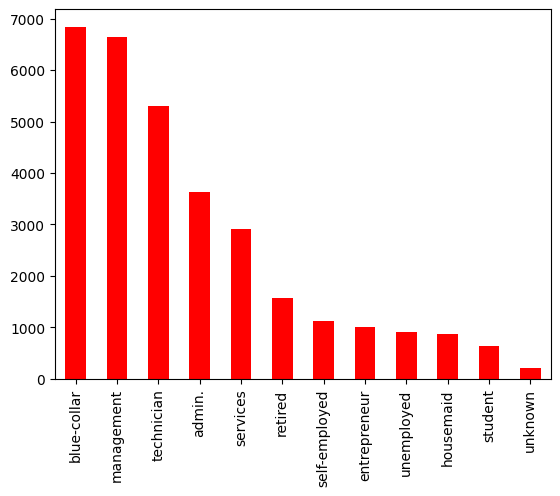

In [39]:
train['job'].value_counts().plot.bar(color="Red")

most client belong to blue-collar and students take least deposit.

now letscheck other variables also . Such as checking the default history

<AxesSubplot: >

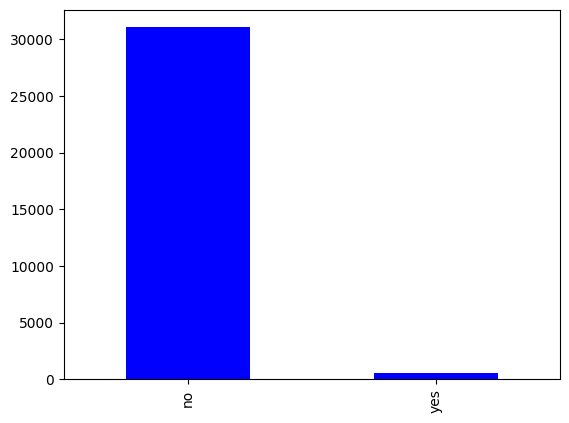

In [44]:
train['default'].value_counts().plot.bar(color='Blue')

<AxesSubplot: >

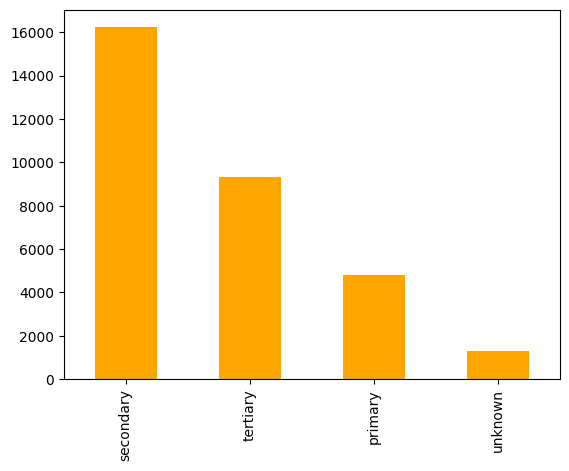

In [43]:
train['education'].value_counts().plot.bar(color='Orange')

Clients with secondary education are more

# Bivariant analysis

Now lets look at the continuous and numeric variables using scatter plot and bar charts

In [58]:
pd.crosstab(train['job'],train['subscribed'])

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26

Now checking relation between default and subscribed.

In [57]:
pd.crosstab(train['default'],train['subscribed'])bbb

subscribed     no   yes
default                
no          27388  3674
yes           544    41

Text(0, 0.5, 'Percentage')

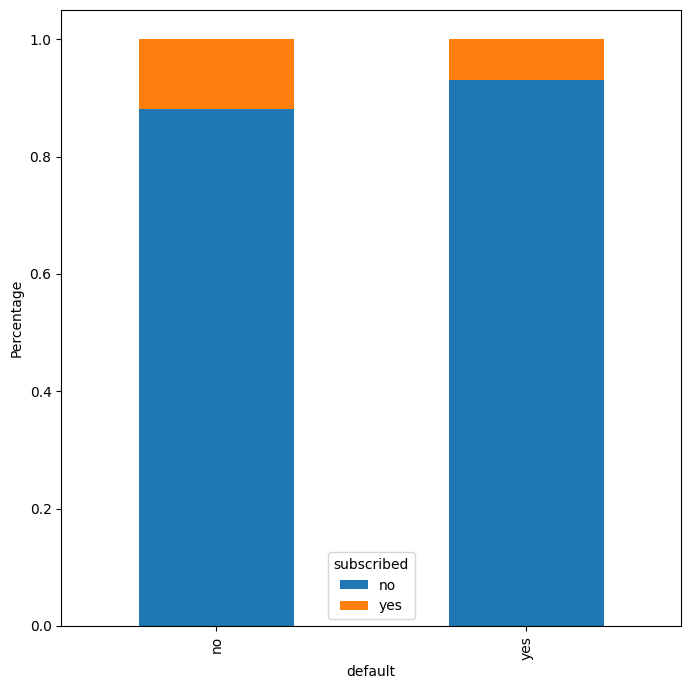

In [69]:
default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

In [70]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [75]:
corr = train.corr()
#print(corr)

<AxesSubplot: >

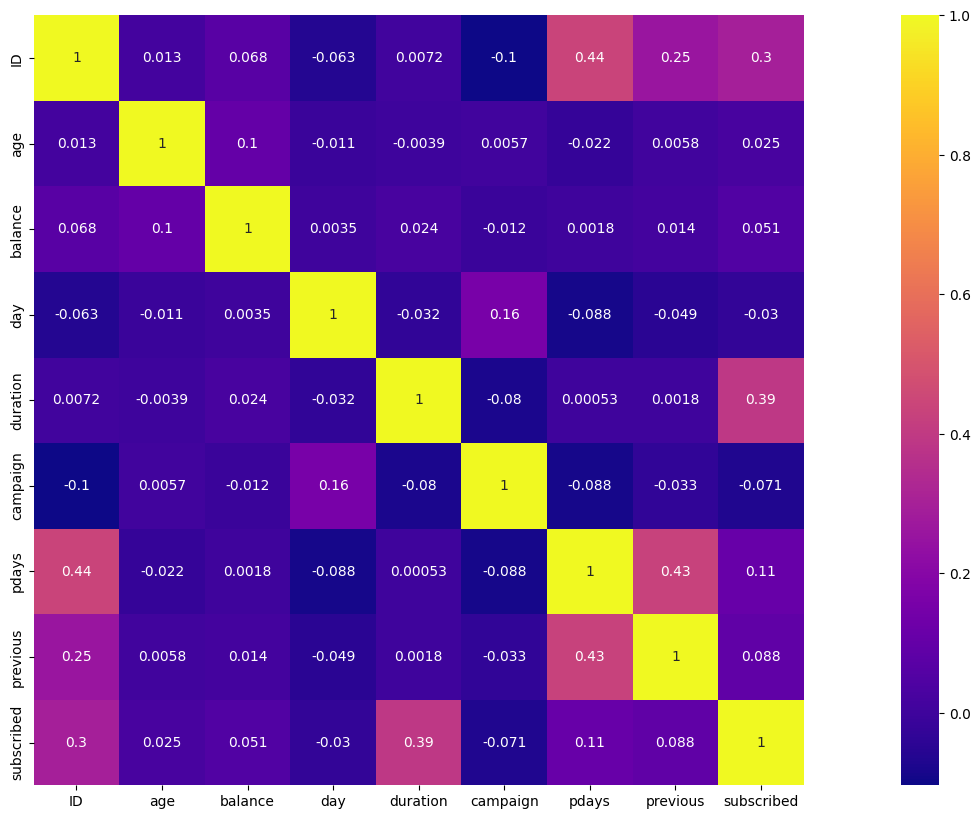

In [84]:
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(25,10)
sn.heatmap(corr,vmax=.9, square=True,annot=True, cmap="plasma")

 we will start to build our predictive model to predict whether a client will subscribe to a term deposit or not.

In [96]:
target = train['subscribed']
train = train.drop('subscribed',1)


In [97]:
train = pd.get_dummies(train)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.3, random_state=12)

# Linear model

In [100]:
from sklearn.linear_model import LinearRegression


In [104]:
#reg=LinearRegression()
#reg.fit(X_train,y_train)    #ValueError: could not convert string to float: 'no'

# Logistic Model 

we will use logistic model because we have subscribe out as 0/1 means yes or no

# Decision Tree

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
lreg = LogisticRegression()

In [107]:
lreg.fit(X_train,y_train)

LogisticRegression()

In [108]:
prediction = lreg.predict(X_val)

In [130]:
m=pd.DataFrame(prediction)

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, prediction)


0.8904686677198526

Here we got accuracy around 90%

In [134]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [135]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [137]:

predict = clf.predict(X_val)
accuracy_score(y_val, predict)

0.9023696682464455

We got an accuracy of more than 90% 

In [143]:
submission = pd.DataFrame()
submission['ID'] = test['ID']
submission['subscribed'] = predict[9494]

In [144]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [145]:
submission.to_csv('submission.csv', header=True, index=False)